Import Libraries:

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re

Load Dataset:

In [4]:
df = pd.read_csv('dataset.csv')
df

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


Text Cleaning

In [5]:
import re
def textCleaning(text):
    text=text.lower()
    text = re.sub(r"[^a-z\s]","",text)
    text = re.sub(r'https\S+',"",text)
    text = re.sub(r'http\S+',"",text)
    text = re.sub(r'\\S+',"",text)
    text = re.sub(r'\s+'," ",text)
    return text.strip()
df['clean_text'] = df['text'].apply(textCleaning)

Tokenization and stopwords

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def tokenize(text):
    token = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filter_tokens = [word for word in token if word not in stop_words]
    return filter_tokens
df['tokens'] = df['clean_text'].apply(tokenize)

TFIDF Vectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['tokens_str'] = df['tokens'].apply(lambda x: " ".join(x))
vectorizer = TfidfVectorizer(max_features=1000000);
tfid_matrix = vectorizer.fit_transform(df['tokens_str'])

Spliting of data:

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tfid_matrix,df['label'],test_size=0.2,random_state=42)

Model:

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

Training

In [10]:
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Evaluation:

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test)
print("Accuraccy:",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)
print("Classification report:\n",classification_report(y_test,y_pred))

Accuraccy: 0.9748951467944877
Confusion matrix:
 [[7853   85]
 [ 334 8418]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      7938
           1       0.99      0.96      0.98      8752

    accuracy                           0.97     16690
   macro avg       0.97      0.98      0.97     16690
weighted avg       0.98      0.97      0.97     16690



Heatmap of confusion matrix

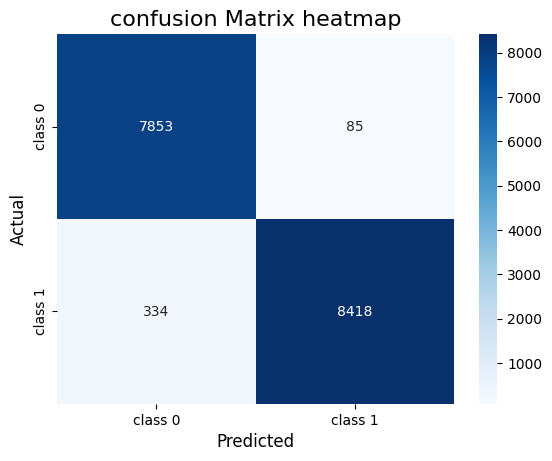

In [12]:
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',xticklabels=['class 0','class 1'],yticklabels=['class 0', 'class 1'])
plt.title("confusion Matrix heatmap", fontsize = 16)
plt.ylabel("Actual", fontsize= 12)
plt.xlabel("Predicted",fontsize= 12)
plt.show()

Pkl files:

In [13]:
import joblib
joblib.dump(model, "Model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']